## KNN Model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

%matplotlib inline

In [20]:
cirr = pd.read_csv('../datasets/cirr_knn.csv')

In [21]:
cirr['albumin'] = cirr['albumin'].astype(int)
cirr['prothrombin'] = cirr['prothrombin'].astype(int)
cirr['stage'] = cirr['stage'].astype(int)

In [22]:
cirr.head(10)

,id,n_days,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2,156.0,1718.0,137.95,172.0,190.0,12,4
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4,54.0,7394.8,113.52,88.0,221.0,10,3
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3,210.0,516.0,96.10,55.0,151.0,12,4
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2,64.0,6121.8,60.63,92.0,183.0,10,4
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3,143.0,671.0,113.15,72.0,136.0,10,3
5,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4,52.0,824.0,60.45,213.0,204.0,9,3
6,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4,52.0,4651.2,28.38,189.0,373.0,11,3
7,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3,79.0,2276.0,144.15,88.0,251.0,11,2
8,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2,140.0,918.0,147.25,143.0,302.0,11,4
9,11,3762,D,Placebo,19619,F,N,Y,Y,N,1.4,259.0,4,46.0,1104.0,79.05,79.0,258.0,12,4


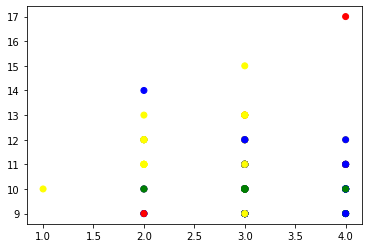

In [25]:
colors = ['orange','red', 'green', 'blue', 'yellow']
color_series = cirr['stage'].map(lambda s: colors[s])
plt.scatter(cirr['albumin'], cirr['prothrombin'], color=color_series)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


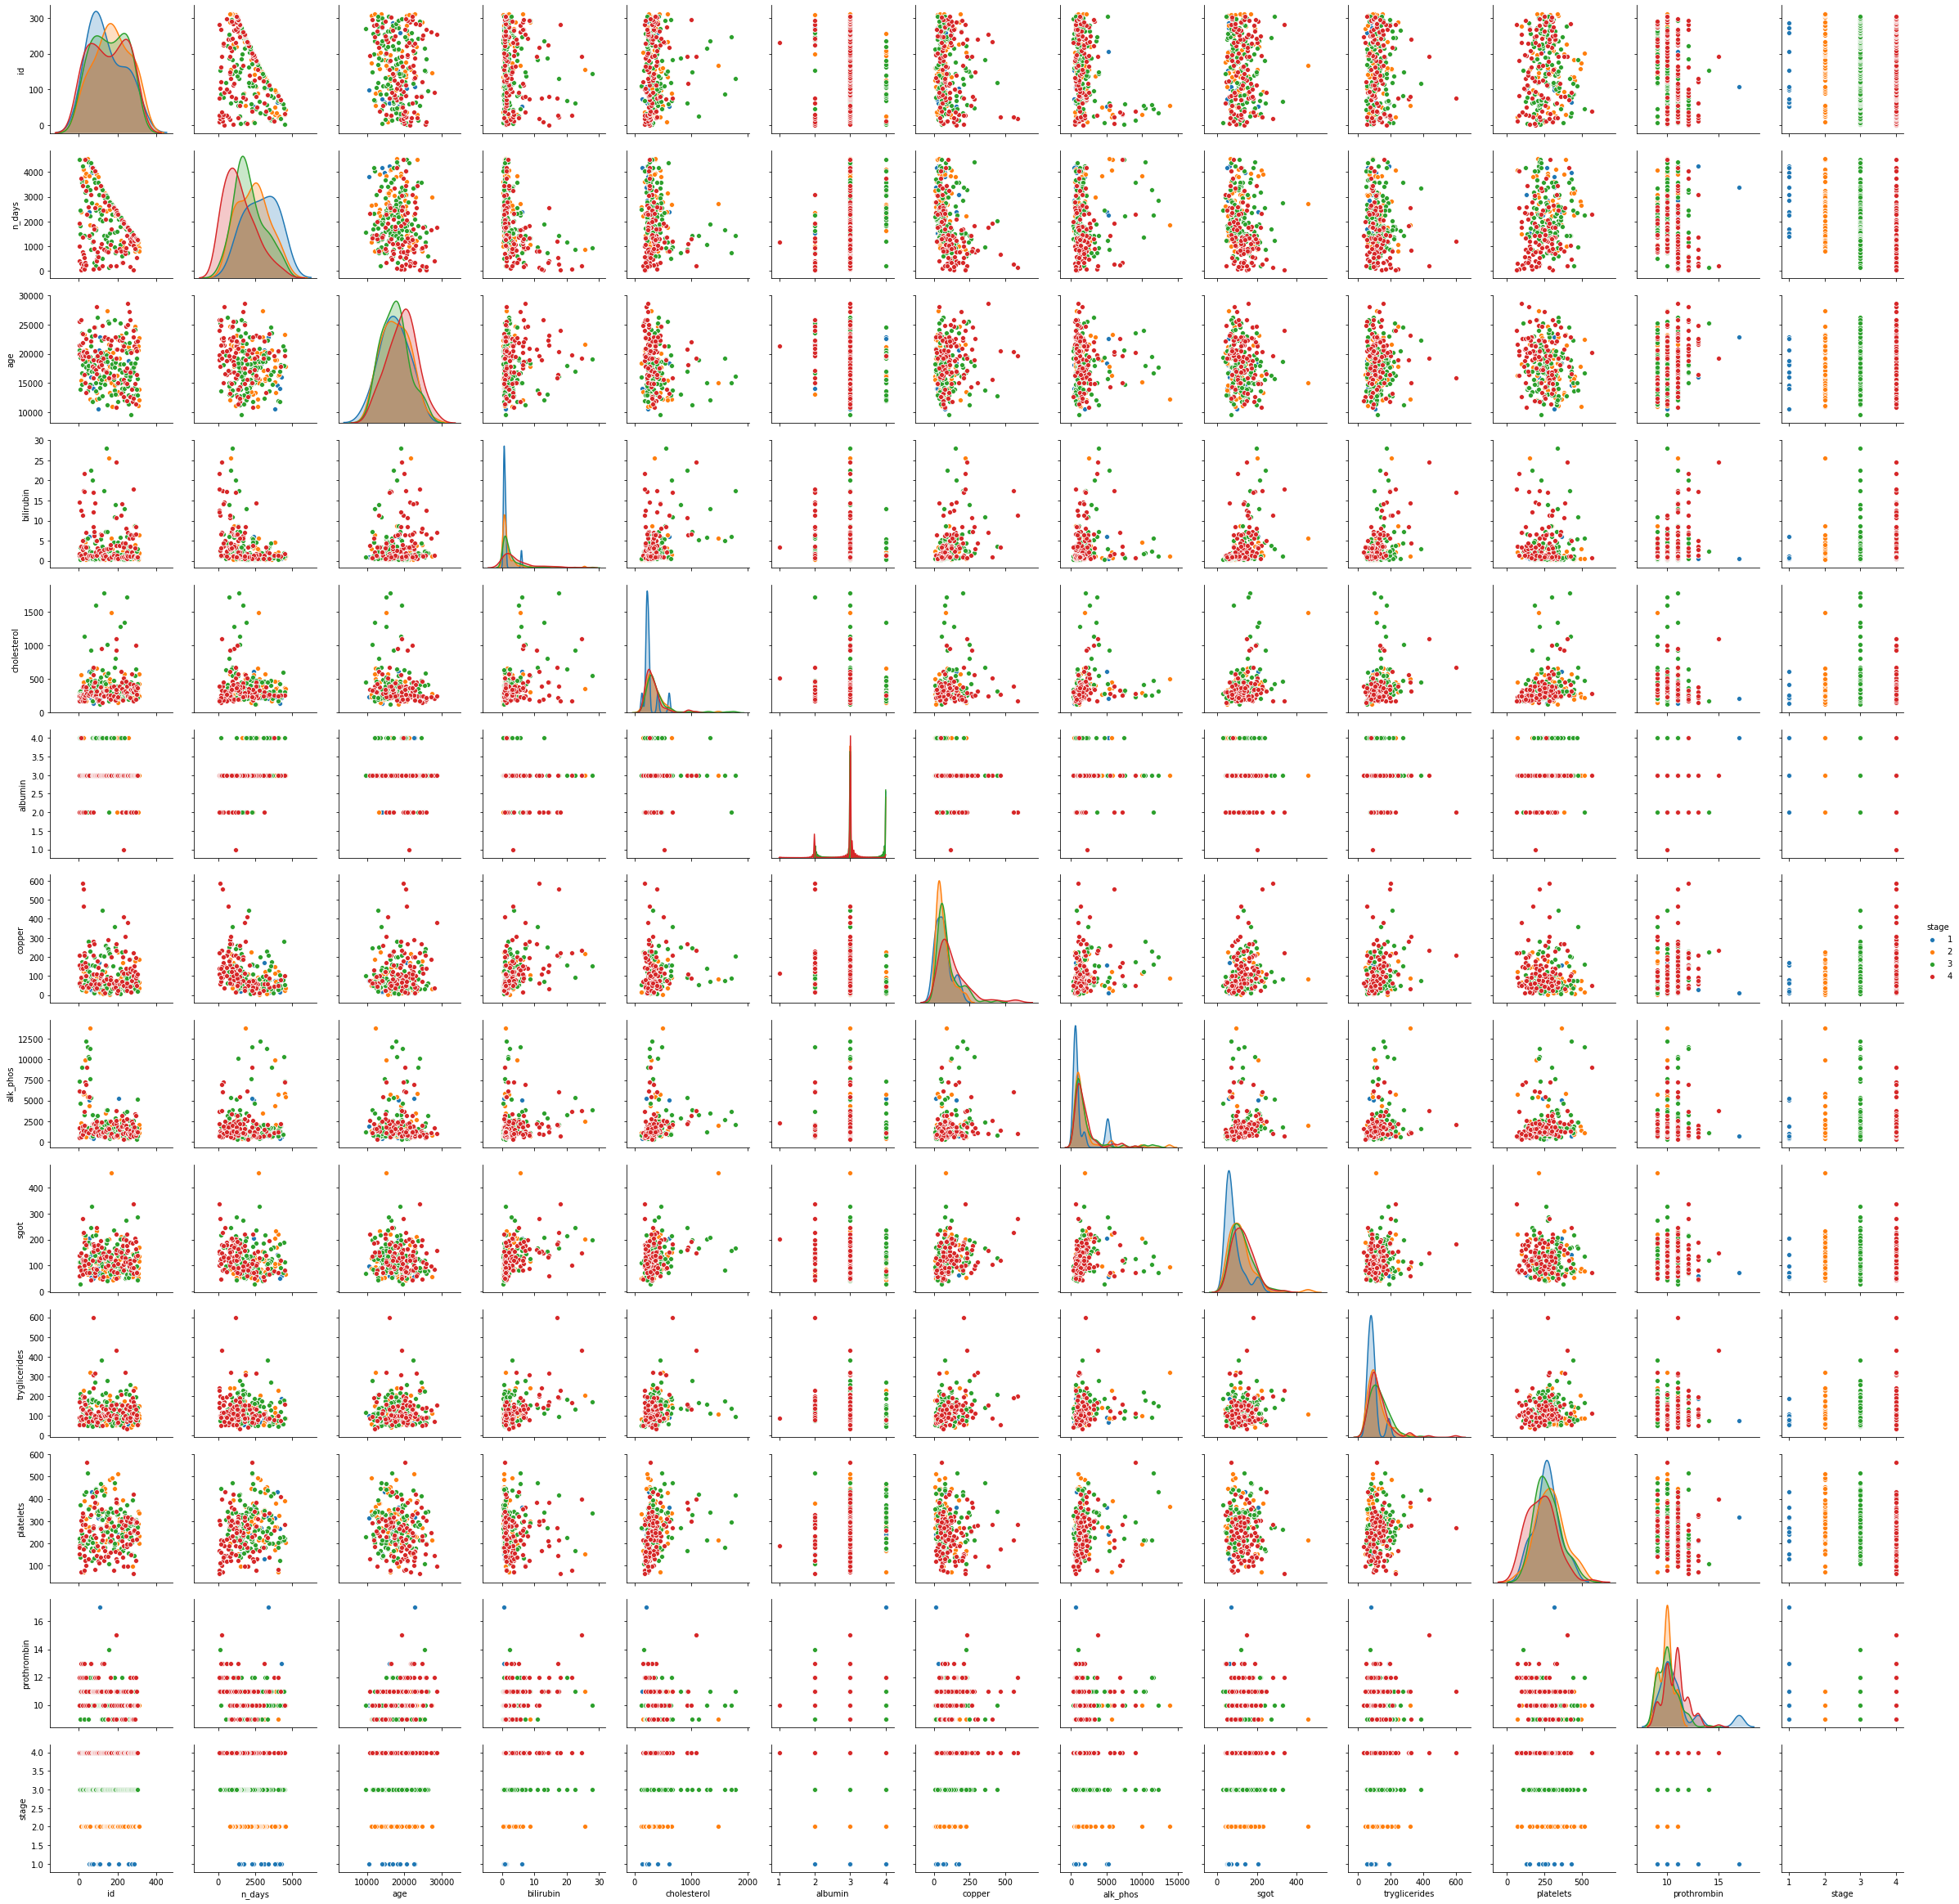

In [26]:
sns.pairplot(cirr, hue='stage')